In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

In [2]:
#Generate a toy dataset to check the algorithm

m = 10 # half number of samples
n = 3 # number of features

x1 = np.random.rand(m,n+1)
x1[:,0] *= 3
x1[:, -1] = 1

x2 = np.random.randn(m,n+1)
x2[:, -1] = 0

Xt = np.vstack((x1, x2))

In [3]:
# Shuffle the toy dataset
np.random.shuffle(Xt)
Xt[:10]

array([[-0.88778575, -1.98079647, -0.34791215,  0.        ],
       [ 0.17742614, -0.40178094, -1.63019835,  0.        ],
       [ 0.06651722,  0.3024719 , -0.63432209,  0.        ],
       [ 1.2709644 ,  0.64589411,  0.43758721,  1.        ],
       [ 2.93585503,  0.79915856,  0.46147936,  1.        ],
       [ 1.56554497,  0.41466194,  0.26455561,  1.        ],
       [ 0.06065519,  0.83261985,  0.77815675,  1.        ],
       [-0.67246045, -0.35955316, -0.81314628,  0.        ],
       [ 1.83628717,  0.616934  ,  0.94374808,  1.        ],
       [-0.51080514, -1.18063218, -0.02818223,  0.        ]])

In [4]:
# Separate the features and labels
X0 = Xt[:,:-1] # m samples with n features
y0 = Xt[:,-1] # binary label for m samples

In [5]:
print(X0.shape, y0.shape)

(20, 3) (20,)


In [6]:
class nn:
    '''This is a class that implements a simple two layer dense neural network for binary classification.'''
    
    def __init__(self, threshold=0.5, lr=0.01, n_neurons=[4]):
        self.threshold = threshold
        self.lr = lr
        self.n_neurons = n_neurons
    
    def sigmoid(self, Z):
        # Function for sigmoid activation
        A = 1 / (1 + np.exp(-Z))
        return A
    
    def forward_prop(self, X, W, b):
        # This function will perform one pass of forward propogation
        Z = np.dot(W, X) + b
        A = self.sigmoid(Z)
        return A
    
    def final_result(self, y, A):
        # This function will produce the yhat converted based on threshhold and calculate accuracy
        mask0 = A <= self.threshold
        mask1 = A > self.threshold
        yhat = A.copy()
        yhat[mask0] = 0
        yhat[mask1] = 1
        
        # Add each accuracy to a list for plotting
        acc = np.sum((1 - abs(y - A)) * 100)/y.shape[1]
        print("Accuracy: ", acc)
        self.accuracy.append(acc)
        return (yhat)
    
    def back_prop_final(self, prev_A, y, m, A):
        # This function will perform one pass of backward propogation on the final layer     
        dZ = y - A                                           # dJ/dZ = dJ/dA * dA/dZ
        dW = np.dot(dZ, prev_A.T)/m                          # dJ/dW = X * dJ/dZ
        db = (np.sum(dZ, keepdims=True))/m                   # dJ/db = sum of dJ/dZ
        return (dW, db, dZ)
    
    def back_prop(self, X, m, A, next_W, next_dZ):
        # This function will perform one pass of backward propogation on the intermediate layer     
        dZ = np.dot(next_W.T, next_dZ) * (A * (1-A))        # dJ/dZ = dJ/dA * dA/dZ
        dW = np.dot(dZ, X.T)/m                              # dJ/dW = X * dJ/dZ
        db = (np.sum(dZ, axis=1, keepdims=True))/m          # dJ/db = sum of dJ/dZ
        return (dW, db)
        
    def fit(self, X, y, epochs=10):
        self.loss = []
        self.accuracy = []
        # This function will repeat forward and backward propogation many times
        X = X.T                                               # transpose X to (n,m) for easy operation
        n, m = X.shape
        y = y.reshape((1, m))                                 # transpose and reshape y to make it order 2 array
        
        self.W1 = np.random.randn(self.n_neurons, n) * 0.01   # Initialize layer 1 weights and make it small
        self.b1 = np.ones((self.n_neurons, 1))                # Initialize layer 1 bias
        
        self.Wf = np.random.randn(1, self.n_neurons) * 0.01   # Initialize layer 1 weights and make it small
        self.bf = 1                                           # Initialize layer 1 bias
        
        for i in range(epochs):
            print("Epoch ", i, " of ", epochs)
            A1 = self.forward_prop(X, self.W1, self.b1)
            Af = self.forward_prop(A1, self.Wf, self.bf)
            yhat = self.final_result(y, Af)
            
            J = -np.sum((y*np.log(Af)) + ((1 - y)*np.log(1 - Af)))/m # loss function
            print("Loss: ", J)
            self.loss.append(J)                                      # add each accuracy to a list for plotting

            dW, db, dZ = self.back_prop_final(prev_A=A1, y=y, m=m, A=Af)
            self.Wf += self.lr * dW                           # update final layer weights 
            self.bf += self.lr * db                           # update final layer bias
            
            dW, db = self.back_prop(X=X, m=m, A=A1, next_W=self.Wf, next_dZ=dZ)
            self.W1 += self.lr * dW                           # update hidden layer weights 
            self.b1 += self.lr * db                           # update hidden layer bias
        print("Forward and backward propogation competed for {} iterations!".format(epochs))
        print("Predicted Output \n", yhat)
 
    def show_plot(self):
        # This function is used to plot the learning history
        plt.figure(figsize=(15,5))
        print("Model Performance Plots")
        
        # Subplot for loss vs number of iterations
        plt.subplot(1,2,1)
        plt.grid(axis='both')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        sns.lineplot(x=range(len(self.loss)), y=self.loss)
        
        # Subplot for accuracy vs number of iterations
        plt.subplot(1,2,2)
        plt.grid(axis='both')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        sns.lineplot(x=range(len(self.accuracy)), y=self.accuracy)
        plt.show()

In [7]:
model = nn(lr=0.1, n_neurons=10)

In [8]:
model.fit(X0, y0, epochs=500)

Epoch  0  of  500
Accuracy:  50.00029509399592
Loss:  0.8025673712040085
Epoch  1  of  500
Accuracy:  49.99977782053435
Loss:  0.7734479140449139
Epoch  2  of  500
Accuracy:  50.000059450335435
Loss:  0.7515353439167335
Epoch  3  of  500
Accuracy:  50.00144228264283
Loss:  0.7352765525520673
Epoch  4  of  500
Accuracy:  50.00407393699486
Loss:  0.7233376792916693
Epoch  5  of  500
Accuracy:  50.00797736016841
Loss:  0.7146324133425759
Epoch  6  of  500
Accuracy:  50.01309052623773
Loss:  0.7083100348416898
Epoch  7  of  500
Accuracy:  50.019302500405125
Loss:  0.7037231997429526
Epoch  8  of  500
Accuracy:  50.026480673315895
Loss:  0.7003895386047783
Epoch  9  of  500
Accuracy:  50.03448887301814
Loss:  0.6979550339856894
Epoch  10  of  500
Accuracy:  50.04319811530166
Loss:  0.6961626997478194
Epoch  11  of  500
Accuracy:  50.0524921488194
Loss:  0.6948274482901593
Epoch  12  of  500
Accuracy:  50.06226963963583
Loss:  0.6938167227547907
Epoch  13  of  500
Accuracy:  50.0724443491851

Accuracy:  54.39224209014576
Loss:  0.6132240433531334
Epoch  181  of  500
Accuracy:  54.449480174536504
Loss:  0.6122379147914089
Epoch  182  of  500
Accuracy:  54.507344824513936
Loss:  0.6112420559765497
Epoch  183  of  500
Accuracy:  54.56583972862529
Loss:  0.6102364346587918
Epoch  184  of  500
Accuracy:  54.62496845038534
Loss:  0.6092210212583532
Epoch  185  of  500
Accuracy:  54.68473442309835
Loss:  0.608195788945927
Epoch  186  of  500
Accuracy:  54.74514094467859
Loss:  0.6071607137222571
Epoch  187  of  500
Accuracy:  54.8061911724774
Loss:  0.6061157744966212
Epoch  188  of  500
Accuracy:  54.867888118126565
Loss:  0.6050609531640545
Epoch  189  of  500
Accuracy:  54.9302346424066
Loss:  0.6039962346811427
Epoch  190  of  500
Accuracy:  54.99323345015
Loss:  0.6029216071402075
Epoch  191  of  500
Accuracy:  55.05688708518852
Loss:  0.6018370618417107
Epoch  192  of  500
Accuracy:  55.12119792535484
Loss:  0.6007425933647051
Epoch  193  of  500
Accuracy:  55.18616817754832

Accuracy:  65.7423341029183
Loss:  0.4356681387509477
Epoch  306  of  500
Accuracy:  65.84828337644481
Loss:  0.43416526847541415
Epoch  307  of  500
Accuracy:  65.95407214569174
Loss:  0.43266733869218654
Epoch  308  of  500
Accuracy:  66.05969243794074
Loss:  0.43117444735103366
Epoch  309  of  500
Accuracy:  66.1651364164849
Loss:  0.4296866898184944
Epoch  310  of  500
Accuracy:  66.27039638161894
Loss:  0.42820415888444624
Epoch  311  of  500
Accuracy:  66.37546477151523
Loss:  0.4267269447703107
Epoch  312  of  500
Accuracy:  66.48033416298782
Loss:  0.42525513513883517
Epoch  313  of  500
Accuracy:  66.58499727214706
Loss:  0.4237888151053954
Epoch  314  of  500
Accuracy:  66.68944695494736
Loss:  0.4223280672507591
Epoch  315  of  500
Accuracy:  66.7936762076304
Loss:  0.420872971635254
Epoch  316  of  500
Accuracy:  66.89767816706701
Loss:  0.41942360581428223
Epoch  317  of  500
Accuracy:  67.00144611099924
Loss:  0.41798004485512497
Epoch  318  of  500
Accuracy:  67.10497345

Accuracy:  78.17161338221969
Loss:  0.27761748007134324
Epoch  462  of  500
Accuracy:  78.2230887360252
Loss:  0.2770426717075786
Epoch  463  of  500
Accuracy:  78.27427048271852
Loss:  0.2764718403923287
Epoch  464  of  500
Accuracy:  78.32516037966641
Loss:  0.27590495514056634
Epoch  465  of  500
Accuracy:  78.375760180088
Loss:  0.2753419851469271
Epoch  466  of  500
Accuracy:  78.42607163283932
Loss:  0.2747828997870153
Epoch  467  of  500
Accuracy:  78.47609648220563
Loss:  0.27422766861861947
Epoch  468  of  500
Accuracy:  78.52583646770061
Loss:  0.2736762613828399
Epoch  469  of  500
Accuracy:  78.57529332387327
Loss:  0.2731286480051306
Epoch  470  of  500
Accuracy:  78.62446878012133
Loss:  0.2725847985962579
Epoch  471  of  500
Accuracy:  78.6733645605119
Loss:  0.2720446834531793
Epoch  472  of  500
Accuracy:  78.7219823836086
Loss:  0.2715082730598434
Epoch  473  of  500
Accuracy:  78.77032396230518
Loss:  0.27097553808791447
Epoch  474  of  500
Accuracy:  78.818391003665

In [9]:
print(y0)

[0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]


Model Performance Plots


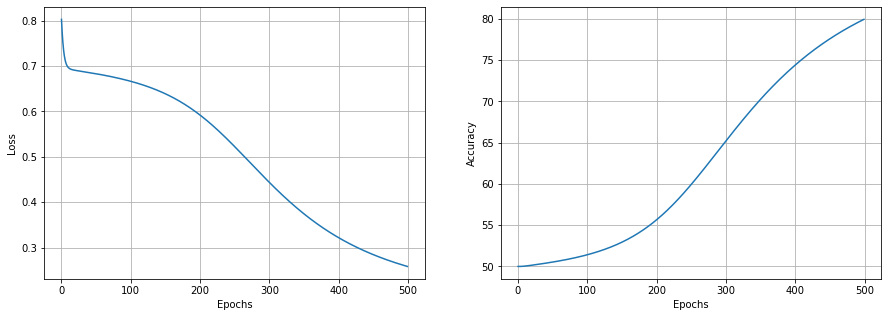

In [10]:
model.show_plot()

In [11]:
max(model.accuracy)

79.93570061196132

In [12]:
from sklearn.datasets import make_classification

In [13]:
X, y = make_classification(n_samples=100, n_features=4, n_classes=2, scale=1.0, shuffle=True, random_state=7)

In [14]:
X.shape

(100, 4)

In [15]:
y.shape

(100,)

In [16]:
y

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [17]:
model_1 = nn(lr=0.1, n_neurons=20)

In [18]:
model_1.fit(X, y, epochs=1000)

Epoch  0  of  1000
Accuracy:  50.96182026286296
Loss:  0.803005193752262
Epoch  1  of  1000
Accuracy:  50.74930645603081
Loss:  0.753216484842035
Epoch  2  of  1000
Accuracy:  50.57378198118263
Loss:  0.7246861855913131
Epoch  3  of  1000
Accuracy:  50.43880200457202
Loss:  0.7091440653330356
Epoch  4  of  1000
Accuracy:  50.33980389400965
Loss:  0.7009219326151276
Epoch  5  of  1000
Accuracy:  50.269503365667454
Loss:  0.6966247283322987
Epoch  6  of  1000
Accuracy:  50.22083334084995
Loss:  0.6943718195081817
Epoch  7  of  1000
Accuracy:  50.1879806264078
Loss:  0.6931663213646607
Epoch  8  of  1000
Accuracy:  50.16650612020155
Loss:  0.6924925397006585
Epoch  9  of  1000
Accuracy:  50.15314344166959
Loss:  0.6920872689423406
Epoch  10  of  1000
Accuracy:  50.14553560033427
Loss:  0.6918171639049995
Epoch  11  of  1000
Accuracy:  50.14199993666993
Loss:  0.6916149409483383
Epoch  12  of  1000
Accuracy:  50.141342523649385
Loss:  0.6914467191864262
Epoch  13  of  1000
Accuracy:  50.14

Accuracy:  59.3590306833294
Loss:  0.5350644915585935
Epoch  265  of  1000
Accuracy:  59.47384294949072
Loss:  0.5334063998850683
Epoch  266  of  1000
Accuracy:  59.589154318044066
Loss:  0.5317466736892026
Epoch  267  of  1000
Accuracy:  59.70494242918079
Loss:  0.5300856709055335
Epoch  268  of  1000
Accuracy:  59.82118470297679
Loss:  0.5284237478055918
Epoch  269  of  1000
Accuracy:  59.937858363723215
Loss:  0.5267612586039451
Epoch  270  of  1000
Accuracy:  60.05494046442849
Loss:  0.5250985550717794
Epoch  271  of  1000
Accuracy:  60.17240791143141
Loss:  0.5234359861588868
Epoch  272  of  1000
Accuracy:  60.29023748906713
Loss:  0.5217738976248881
Epoch  273  of  1000
Accuracy:  60.40840588432727
Loss:  0.5201126316804757
Epoch  274  of  1000
Accuracy:  60.52688971145664
Loss:  0.518452526639416
Epoch  275  of  1000
Accuracy:  60.64566553642973
Loss:  0.5167939165820021
Epoch  276  of  1000
Accuracy:  60.76470990125163
Loss:  0.5151371310305999
Epoch  277  of  1000
Accuracy:  6

Epoch  507  of  1000
Accuracy:  77.97317894411474
Loss:  0.3035118958198808
Epoch  508  of  1000
Accuracy:  78.00798541709237
Loss:  0.3030716917527878
Epoch  509  of  1000
Accuracy:  78.04262759710029
Loss:  0.30263377642936357
Epoch  510  of  1000
Accuracy:  78.07710676063186
Loss:  0.30219814160411523
Epoch  511  of  1000
Accuracy:  78.11142416683546
Loss:  0.3017647790431083
Epoch  512  of  1000
Accuracy:  78.1455810577486
Loss:  0.30133368052202775
Epoch  513  of  1000
Accuracy:  78.17957865853042
Loss:  0.3009048378243453
Epoch  514  of  1000
Accuracy:  78.21341817769222
Loss:  0.30047824273958745
Epoch  515  of  1000
Accuracy:  78.2471008073261
Loss:  0.3000538870617041
Epoch  516  of  1000
Accuracy:  78.2806277233319
Loss:  0.2996317625875336
Epoch  517  of  1000
Accuracy:  78.31400008564218
Loss:  0.299211861115362
Epoch  518  of  1000
Accuracy:  78.34721903844513
Loss:  0.29879417444357415
Epoch  519  of  1000
Accuracy:  78.38028571040606
Loss:  0.29837869436939374
Epoch  520

Accuracy:  83.32251021299692
Loss:  0.244176743273628
Epoch  756  of  1000
Accuracy:  83.33497197259737
Loss:  0.24406733230654495
Epoch  757  of  1000
Accuracy:  83.34738410759601
Loss:  0.24395851091746998
Epoch  758  of  1000
Accuracy:  83.359746834927
Loss:  0.24385027539814894
Epoch  759  of  1000
Accuracy:  83.37206037073516
Loss:  0.24374262206365443
Epoch  760  of  1000
Accuracy:  83.38432493037634
Loss:  0.24363554725226252
Epoch  761  of  1000
Accuracy:  83.39654072841739
Loss:  0.24352904732532768
Epoch  762  of  1000
Accuracy:  83.4087079786363
Loss:  0.24342311866715924
Epoch  763  of  1000
Accuracy:  83.42082689402255
Loss:  0.24331775768489775
Epoch  764  of  1000
Accuracy:  83.43289768677705
Loss:  0.24321296080839108
Epoch  765  of  1000
Accuracy:  83.44492056831255
Loss:  0.24310872449007115
Epoch  766  of  1000
Accuracy:  83.4568957492537
Loss:  0.2430050452048312
Epoch  767  of  1000
Accuracy:  83.46882343943747
Loss:  0.24290191944990216
Epoch  768  of  1000
Accura

Model Performance Plots


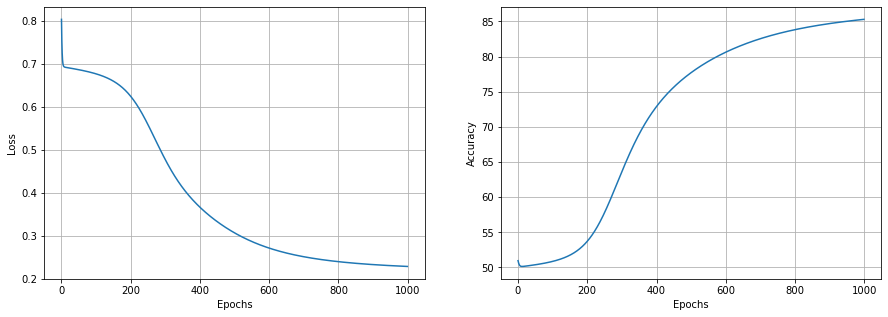

In [19]:
model_1.show_plot()